# Projet Manipulation Image

## Partie 1: Valeurs de couleur

In [199]:
%matplotlib inline
import matplotlib.pyplot as plt
import math
import random
import numpy as np
import matplotlib.path as mpath
import matplotlib.lines as mlines
import matplotlib.patches as mpatches
import matplotlib.image as mpimg

In [200]:
## Creer votre propre Type de données abstrait Couleur sous python avec les caractériistiques suivants:
class Couleur:
    '''
    Constructeur à 3 paramétres qui represente les valeurs entiéres des différentes couleurs
    '''
    #Complexité Constante : Grand-thêta(1) car T(n)=5
    
    def __init__(self, R, G, B, name = None):
       #Mettre R, G ou B à 255 si celles-ci sont supérieures à 255
        if(R>255):  
            R=255
        if(G>255):
            G=255
        if(B>255):
            B=255
        self.R = int(R)
        self.G = int(G)
        self.B = int(B)
            
        
    '''
    Creer une couleur à partir d'une liste
    '''
    #Commplexité Linéaire : Grand-thêta(n)
    
    @staticmethod
    def creerCouleur(listeRGB):
        
        #Générer et retourner une couleur à partir de listeRGB 
        
        return Couleur(random.choice(listeRGB), random.choice(listeRGB), random.choice(listeRGB))
        
    '''
    Recupération de l'intensite de la couleur rouge
    '''
    #Complexité Constante: T(n) = 1 alors T(n) = Grand-thêta(1)
    def getR(self):                                 
        return self.R
    
    
    
    
    '''
    Recupération de l'intensite de la couleur verte
    '''
    #Complexité constante
    def getG(self):
        return self.G
    '''
    Recupération de l'intensite de la couleur verte
    '''
    #Complexité constante
    def getB(self):
        return self.B
    '''
    Version brillante de cet objet couleur
    Il faut caculer le meme pourcentage de R,G,B
    Ajouter ces valeurs aux valeurs R,G,B de l'objet couleur originel
    Retourne un objet couleur
    '''
    #Complexité constante : T(n) = 12 alors T(n) = Grand-thêta(1)
    def brighter(self,pourcentage):                              
        #Pourcentage des valeurs R, G, B de l'objet
        Rpourcentage = self.getR() * pourcentage
        Gpourcentage = self.getG() * pourcentage
        Bpourcentage = self.getB() * pourcentage
    
        #Valeurs de la version brillante de l'objet
        brighterRed = self.getR() + Rpourcentage
        brighterGreen = self.getG() + Gpourcentage
        brighterBlue = self.getB() + Bpourcentage
        
        return Couleur( int(brighterRed), int(brighterGreen), int(brighterBlue))
    
        
        
    '''
    Version sombre de cet objet couleur
    
    Il suffit de multiplier toutes les composantes R, G, B par le pourcentage passé en paramétre
    
    https://graphicdesign.stackexchange.com/questions/75417/how-to-make-a-given-color-a-bit-darker-or-lighter
    
    Retourne un objet couleur
    '''
    #Complexité constante : T(n) = 6+5 alors T(n) = Grand-thêta(1)
    def darker(self,pourcentage):                           
        
        #Valeurs de la version sombre de l'objet
        darkerRed = self.getR() * pourcentage
        darkerGreen = self.getG() * pourcentage
        darkerBlue = self.getB() * pourcentage
        
        return Couleur(int(darkerRed), int(darkerGreen), int(darkerBlue))
        
         
        
    '''
    Chaine de caractére representant cet objet couleur
    Retourne un string contenant les valeurs des composantes R,G,B
    '''
    #Complexité constante : T(n) = 6 alors T(n) = Grand-thêta(1)
    def toString(self):                                               
        couleur = "R" + str(self.getR()) + " G" + str(self.getG()) + " B" + str(self.getB())
        return couleur 
    
        
        
    '''
    Comparaison de cet objet couleur avec color
    Retourne un booloean
    '''
    #Complexité constante: T(n) = 3 alors T(n) = Grand-thêta(1)
    def equals(self,color):                                     
        return self.getR() == color.getR() and self.getG() == color.getG() and self.getB() == color.getB()
        
        
    '''
     Calcul de la Luminance. La qualité des 
     images dans les écrans plasmas modernes est une combinaison linéaire des trois couleurs et est définie par
     l'equation Y = 0.299r + 0.587g + 0.114b
     
    '''
    #Complexité constante : T(n) = 6 alors T(n) = Grand-thêta(1)
    def luminance(self):                                                
        Y = (0.299*self.getR()) + (0.587*self.getG()) + (0.114*self.getB())
        return int(Y)
    
       
    '''
     Calcul du niveau de gris. Il faut remplacer chaque intensité de couleur par la valeur entiére de la luminance.
     Il faudra créer une nouvelle couleur avec des intensités égales à la luminance
    '''
    #Complexité constante : T(n) = 3 alors T(n) = Grand-thêta(1)
    def grayScale(self):                   
        self.R = self.luminance()
        self.G = self.luminance()
        self.B = self.luminance()
        
        
    '''
     Compatibilité deux couleurs. Deux couleurs sont compatibles si la différence de leur luminance fait au moins 128
     Retourne un boolean qui vaut true si les deux couleurs sont compatibles et false sinon
    '''
    #Complexité constante : T(n) = 3 alors T(n) = Grand-thêta(1)
    def compatible(self, couleur):
        diff = self.luminance() - couleur.luminance()
        if(math.sqrt(diff) >= 128):
            return True
        return False
    
    '''
     Addition de couleur
    '''
    #Complexité constante : T(n) = Grand-thêta(1)
    def add(self, col):
        return Couleur(self.getR()+col.getR(), self.getG()+col.getG(), self.getB()+col.getB())
    '''
    Fonction permettant d'afficher une couleur dans un cercle. Vous pouvez l'utiliser.
    '''
    def showColor(self):
        fig, ax = plt.subplots()
        # create a grid to plot the color
        grid = np.mgrid[0.2:0.8:3j, 0.2:0.8:3j].reshape(2, -1).T
        # add a circle
        circle = mpatches.Circle(grid[0], 0.05, ec="none",color=(self.R/255,self.G/255,self.B/255))
        ax.add_patch(circle)
        #ax.add_line(line)

        plt.axis('equal')
        plt.axis('off')
        plt.tight_layout()
    
        plt.show()

        
    

Couleur créée 
R233 G78 B61
comparaison de l'image avec Couleur(0,123,130) =  False


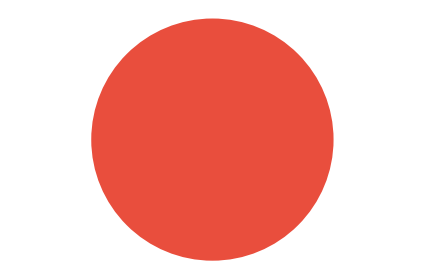

Version brillante
R255 G117 B91


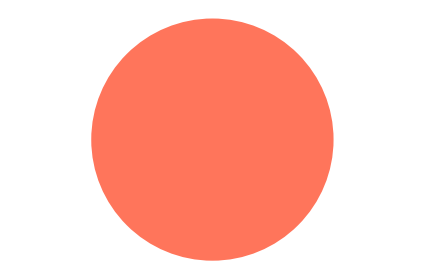

Version sombre
R116 G39 B30


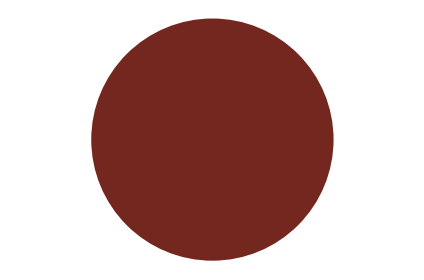

Version grisée
R122 G89 B95


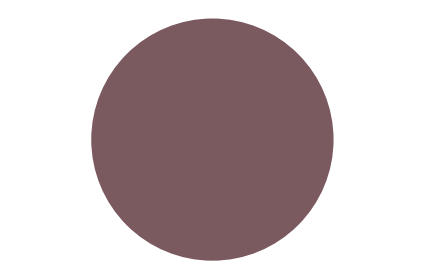

In [201]:
#creer un objet couleur
c = Couleur(0, 123, 130)

#créer un objet couleur à partir d'une liste
liste = range(255)          
created = Couleur.creerCouleur(liste)

print("Couleur créée ")
print(created.toString()) 

#comparer la couleur générée c
print("comparaison de l'image avec Couleur(0,123,130) = ", c.equals(created))
              
#Affichage de la couleur générée
created.showColor()

print("Version brillante")
print(created.brighter(0.5).toString())
created.brighter(0.5).showColor()

print("Version sombre")
print(created.darker(0.5).toString())
created.darker(0.5).showColor()

created.grayScale()
print("Version grisée")
print(created.toString())
created.showColor()
#print(c.compatible(Couleur(10,20,30)))


## Partie 2: Traitement d'image

In [202]:
## Image Processing
class Picture:
    '''
    Creer une image à partir d'un fichier en utilisant la fonction imread() de matplotlig.image ou plus généralement la 
    librairie Pillow
    '''
    #Complexité Constante : Grand-thêta(1)
    def __init__(self, nomFichier = None, H = None, W = None):
        if nomFichier == None:
                
            '''
            Creer une image blanche de hauteur H et de largeur W
            '''
            self.H = H
            self.W = W
            self.img = np.zeros((H,W,3), dtype=np.uint8)     #définir l'image par défaut sous 8 bits
            
        else:
                
            '''
            Creer une image à partir d'un fichier
            '''
            
            self.img = mpimg.imread(nomFichier)
            self.img = self.img[:,:,:3].copy()                 #définir une image à 3 plans au lieu de 4
            self.img = (self.img * 255).astype(np.uint8)       #définir le type de l'image en 8 bits
            self.H = self.img.shape[1]
            self.W = self.img.shape[0]
            
    
    '''
    Retourne la hauteur H
    '''
    #Complexité Constante : Grand-thêta(1)
    def getH(self):
        return self.H
    '''
    Retourne la largeur W
    '''
    def getW(self):
        return self.W
    '''
    Retourne le tableau numpy constituant l'image
    '''
    def getImg(self):
        return self.img
    '''
    Retourne les couleurs R,G, B sous forme de liste du pixel à la ligne row et la colonne col
    '''
    #Complexité Linéaire : T(n) = n+5 alors T(n) = Grand-thêta(n)
    def getCouleur(self,row, col):
        listeRGB = self.getImg()[row, col]
        return Couleur(listeRGB[0], listeRGB[1], listeRGB[2])
         
    '''
    Modifie les couleurs R,G,B du pixel à la ligne row et la colonne col
    '''
    #Complexité Linéaire : T(n)= n+2 alors T(n) = Grand-thêta(n)
    def setCouleur(self, row, col, couleur):
       
        liste = [couleur.R, couleur.G, couleur.B]
        self.img[row, col] = liste
        
        
    '''
    Affiche une image
    '''
    def affiche(self):
        
        plt.axis('off')
        plt.imshow(self.img)
        plt.show()
        
    '''
    Sauve  une image dans un fichier png
    '''
    def save(self, nomFichier):
        
        plt.imsave(nomFichier, self.img, format = "png")
    
    
    
    

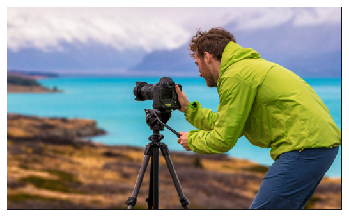

Les dimensions de l'image
Hauteur =  524
Largeur =  318
Les valeurs du pixel (150, 200)
[ 79 182 206]
La couleur du pixel (150, 200)


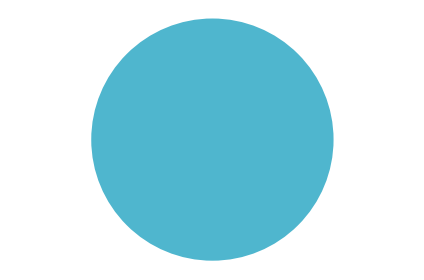

Modifier la couleur en Couleur(150, 10, 100)
les valeurs du pixel après modification
[150  10 100]
R150 G10 B100
la nouvelle couleur du pixel


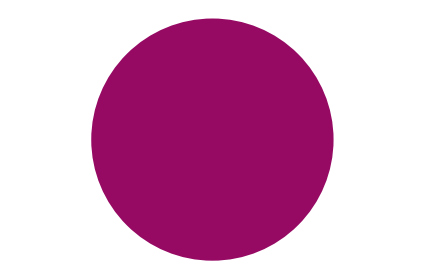

In [203]:
#Créer une image à partir d'un fichier
pic = Picture("capture.png")
pic.affiche()

#Afficher les dimensions de l'image
print("Les dimensions de l'image")
print("Hauteur = ", pic.getH())
print("Largeur = ", pic.getW())

#Afficher les valeurs du pixel
print("Les valeurs du pixel (150, 200)")
print(pic.getImg()[150,200]) 

#Afficher la couleur du pixel
print("La couleur du pixel (150, 200)")
couleur = pic.getCouleur(150,200)
couleur.showColor()

#Modification de la couleur du pixel
c = Couleur(150,10,100)
print("Modifier la couleur en Couleur(150, 10, 100)")
pic.setCouleur(150, 200, c)

#Afficher les valeurs du pixel après modification
print("les valeurs du pixel après modification")
print(pic.getImg()[150,200]) 
modifier = pic.getCouleur(150,200)
print(modifier.toString())
print("la nouvelle couleur du pixel")
modifier.showColor()


## Partie 3: Image Processing

In [204]:
## Image processing
class ImageProcessing:
    
    def __init__(self,image):
        self.image = image
    '''
    Helper function
    '''
    def __calGray__(listePixel):
        A = math.floor(0.299*listePixel[0] + 0.587*listePixel[1] + 0.114*listePixel[2])
        return np.ndarray([A,A,A])
        
    '''
     Transformer en grayscale et visualiser l'image et sa transformée
     Appliquer les fonctions map, reduce ou filter pour reduire la complexite
    '''
    def transformGrayscaleMap(self):
        grayPicture = Picture(None,self.image.W,self.image.H)
        grayPicture.image = map(self.__calGray__,self.image.img[:,:])
        grayPicture.affiche()
        
    '''
     Transformer en grayscale et visualiser l'image et sa transformée
     Une classe gloutonne avec des boucles for
    '''
    #Complexité quadratique: T(n)= Grand-thêta(n^2)
    def transformGrayscaleGlouton(self):
        pic = self.image      
        width = pic.getW()
        height = pic.getH()
        
        #créer une image vide pour contenir l'image grayscale 
        gris = Picture(None, width, height)
        
        for col in range(width):
            for row in range(height):
                color = pic.getCouleur(col, row)
                color.grayScale()
                gris.setCouleur(col, row, color)
                
        print(" Image originale")        
        pic.affiche()
        print(" Image en grayscale")
        gris.affiche()
        
    
    '''
     Creer une image en inversant les proportions de l'image source. Afficher les deux images
    '''
    #Complexité quadratique: T(n)= Grand-thêta(n^2)
    def transformScale(self):
        
        source = self.image
        width  = source.getH()
        height = source.getW()
        
        renverser = Picture(None, width, height)

        for renverserCol in range(width):
            for renverserRow in range(height):
                sourceCol = renverserCol * height  / width
                sourceRow = renverserRow * width / height
                color = source.getCouleur(int(sourceCol), int(sourceRow))
                renverser.setCouleur(renverserCol, renverserRow, color)
            
        print(" Image Originale")
        source.affiche()
        print(" Image inversée")
        renverser.affiche()
        
    '''
    Separer les couleurs d'une image et visualiser les trois couleurs
    '''
    #Complexité quadratique: T(n)= Grand-thêta(n^2)
    def separerCouleur(self):
        pic = self.image
        width  = pic.getW()
        height = pic.getH()

        pictureR = Picture(None, width, height)
        pictureG = Picture(None, width, height)
        pictureB = Picture(None, width, height)

        
        for col in range(width): 
            for row in range(height):
                color = pic.getCouleur(col, row)
                r = color.getR()
                g = color.getG()
                b = color.getB()
                pictureR.setCouleur(col, row, Couleur(r, 0, 0))
                pictureG.setCouleur(col, row, Couleur(0, r, 0))
                pictureB.setCouleur(col, row, Couleur(0, 0, b))
        
        print(" Rouge")
        pictureR.affiche()
        print(" Vert")
        pictureG.affiche()
        print(" Bleu")
        pictureB.affiche()
        
                
    '''
    Filtre de glace: Affecter à chaque pixel p la couleur d'un pixel voisin choisi alétoirement
    (Les coordonnées du pixel et de p doivent différer d'au plus 5).
    Afficher les deux images 
    '''
    #Complexité quadratique: T(n)= Grand-thêta(n^2)
    def filtreGlass(self):
       
        pic = self.image
        width  = pic.getW()
        height = pic.getH()
        glass = Picture(None,width, height)

        for col in range(width):
            for row in range(height):
                colGlass = (width  + col + random.randint(-5, 5)) % width
                rowGlass = (height + row + random.randint(-5, 5)) % height
                color = pic.getCouleur(colGlass, rowGlass)
                glass.setCouleur(col, row, color)
        
        print(" Image Originale")
        pic.affiche()
        print(" Filtre en Verre")
        glass.affiche()
        
    ############################################# SUITE PROJET ###############################################
    '''
      Filtre Moyen
    '''
    def meanFilter(self):
        pic = self.image
        width  = pic.getW()
        height = pic.getH()
        filtre = Picture(None, width, height)


        for y in range(1, height-1):
            for x in range(1, width-1):
                c00 = pic.getCouleur(x-1, y-1)
                c01 = pic.getCouleur(x-1, y)
                c02 = pic.getCouleur(x-1, y+1)
                c10 = pic.getCouleur(x, y-1)
                c11 = pic.getCouleur(x, y)
                c12 = pic.getCouleur(x, y+1)
                c20 = pic.getCouleur(x+1, y-1)
                c21 = pic.getCouleur(x+1, y)
                c22 = pic.getCouleur(x+1, y+1)
                
                r = c00.getR()+c01.getR()+c02.getR()+c10.getR()+c11.getR()+c12.getR()+c20.getR()+c21.getR()+c22.getR()
                    
                g = c00.getG()+c01.getG()+c02.getG()+c10.getG()+c11.getG()+c12.getG()+c20.getG()+c21.getG()+c22.getG()
                    
                b = c00.getB()+c01.getB()+c02.getB()+c10.getB()+c11.getB()+c12.getB()+c20.getB()+c21.getB()+c22.getB()
                    
                c = Couleur(r/9, g/9, b/9)
                filtre.setCouleur(x, y, c)
                
        print(" Image Originale")
        pic.affiche()
        print(" Filtre Moyenneur")
        filtre.affiche()
        
       
    '''
    Filtre Median
    '''
    def medianFilter(self):

        pic  = self.image
        width = pic.getW()
        height = pic.getH()
        liste = [(0,0)] * 9
        filtre = Picture(None, width, height)

        for i in range(1,width-1):
            for j in range(1,height-1):
                liste[0] = pic.getImg()[i-1,j-1]
                liste[1] = pic.getImg()[i-1,j]
                liste[2] = pic.getImg()[i-1,j+1]
                liste[3] = pic.getImg()[i,j-1]
                liste[4] = pic.getImg()[i,j]
                liste[5] = pic.getImg()[i,j+1]
                liste[6] = pic.getImg()[i+1,j-1]
                liste[7] = pic.getImg()[i+1,j]
                liste[8] = pic.getImg()[i+1,j+1]

                
                np.sort(liste)  
                filtre.img[i, j] = liste[4] 
        print(" Image original")
        pic.affiche()
        print(" Filtre Median")
        filtre.affiche()
        
    '''
     Filtre Gaussien : définition de la convolution
    '''

    
    def convolution(self,H):
        pic = self.image
        width = pic.getW()
        height = pic.getH()
        py = (H.shape[0]-1)//2
        px = (H.shape[1]-1)//2
        Y = Picture(None, width, height)
        imax = height-px
        for i in range(px,imax):
            for j in range(py,width-py):
                somme = 0.0
                for k in range(-px,px+1):
                    for l in range(-py,py+1):
                        somme += pic.getImg()[j+l][i+k]*H[l+py][k+px]
                Y.img[j][i] = somme
        return Y
    '''
      Définition du filtre
    '''
    def filtreGaussien(self):
        P=5
        pic = self.image
        epsilon = 0.05
        sigma = 3*1.0/math.sqrt(-2*math.log(epsilon))
        h = np.zeros((2*P+1,2*P+1))
        som = 0
        for m in range(-P,P+1):
            for n in range(-P,P+1):
                h[m+P][n+P] = math.exp(-(n*n+m*m)/(2*sigma*sigma)) #formule du noyau gaussien
                som += h[m+P][n+P]
        h = h/som
        print(" Image Originale")
        pic.affiche()
        print(" Filtre Gaussien")
        self.convolution(h).affiche()
        
    '''
    Filtre Laplacien
    '''
    def filtreLaplacien(self):
        pic = self.image
        width = pic.getW()
        height = pic.getH()
        newimg = Picture(None, width, height)
        for x in range(1, width-1):  
            for y in range(1, height-1): 
                

                # initialiser Gx et Gy à 0 pour chaque pixel
                Gx = 0
                Gy = 0

                # top left pixel
                p = pic.getImg()[x-1, y-1]
                r = p[0]
                g = p[1]
                b = p[2]

                
                intensity = r + g + b

                # accumuler l'intensité à Gx et Gy
                Gx += -intensity
                Gy += -intensity

                # colonne gauche
                p = pic.getImg()[x-1, y]
                r = p[0]
                g = p[1]
                b = p[2]

                Gx += -2 * (r + g + b)

                p = pic.getImg()[x-1, y+1]
                r = p[0]
                g = p[1]
                b = p[2]

                Gx += -(r + g + b)
                Gy += (r + g + b)

                # pixel du milieu
                p = pic.getImg()[x, y-1]
                r = p[0]
                g = p[1]
                b = p[2]

                Gy += -2 * (r + g + b)

                p = pic.getImg()[x, y+1]
                r = p[0]
                g = p[1]
                b = p[2]

                Gy += 2 * (r + g + b)

                # colonne droite
                p = pic.getImg()[x+1, y-1]
                r = p[0]
                g = p[1]
                b = p[2]

                Gx += (r + g + b)
                Gy += -(r + g + b)

                p = pic.getImg()[x+1, y]
                r = p[0]
                g = p[1]
                b = p[2]

                Gx += 2 * (r + g + b)

                p = pic.getImg()[x+1, y+1]
                r = p[0]
                g = p[1]
                b = p[2]

                Gx += (r + g + b)
                Gy += (r + g + b)

                # calculer la taille du gradient selon le théorème de pythagore
                tailleGradient = math.sqrt((Gx * Gx) + (Gy * Gy))

                # normaliser la taille entre 0 et 255
                tailleGradient = tailleGradient / 4328 * 255

                tailleGradient= int(tailleGradient)

                # dessiner la taille du gradient sur newimg
                newimg.img[x,y]=[tailleGradient, tailleGradient, tailleGradient]
        print(" Image Originale")
        pic.affiche()
        print(" Détection des bords")
        newimg.affiche()
        
        

## Convertir une image couleur en grayscale

 Image originale


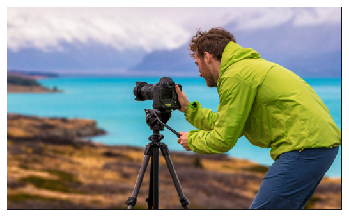

 Image en grayscale


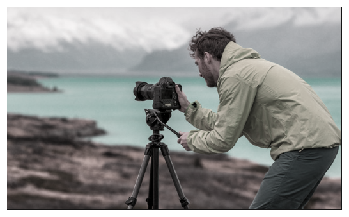

In [205]:
pic = Picture("capture.png")
image = ImageProcessing(pic)
#transformer l'image en grayscale et afficher l'image et sa transformée
image.transformGrayscaleGlouton()

## Changer l'échelle d'une image en inversant la hauteur et la largeur en gardant les mêmes proportions

 Image Originale


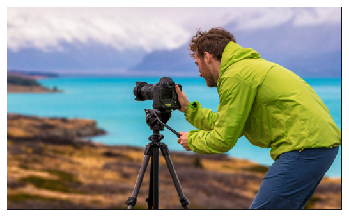

 Image inversée


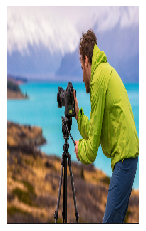

In [188]:
#Inverser les proportions de l'image et afficher l'image et sa transformée
image.transformScale()

## Separation de couleurs

 Rouge


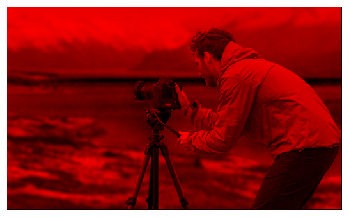

 Vert


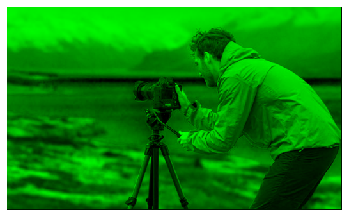

 Bleu


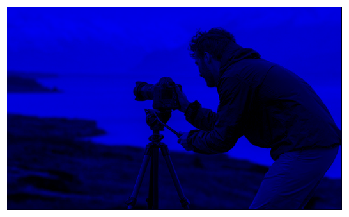

In [189]:
#Séparer les couleurs de l'image et afficher les trois images
image.separerCouleur()

## Glass Filter

 Image Originale


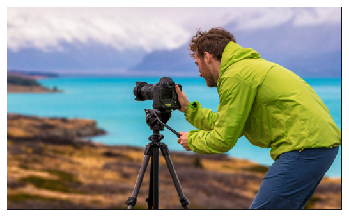

 Filtre en Verre


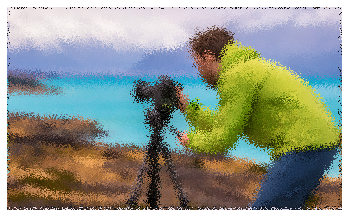

In [190]:
#Mettre l'image en filtre verre et afficher l'image et sa transformée
image.filtreGlass()

## Mean Filter

 Image Originale


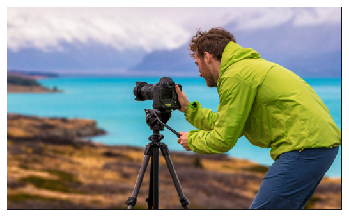

 Filtre Moyenneur


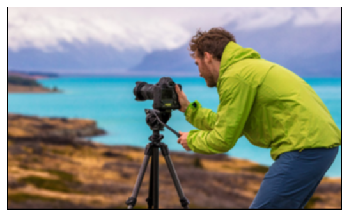

In [191]:
#Filtre Moyen
image.meanFilter()

## Median Filter

 Image original


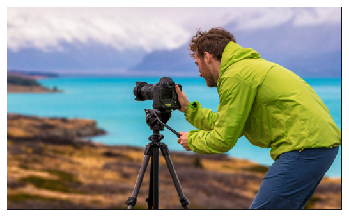

 Filtre Median


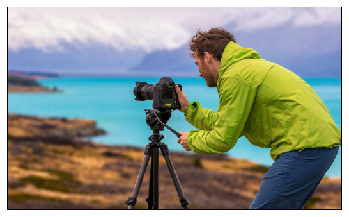

In [192]:
#Filtre Median
image.medianFilter()

## Filtre Gaussien ou Smoothing filter

 Image Originale


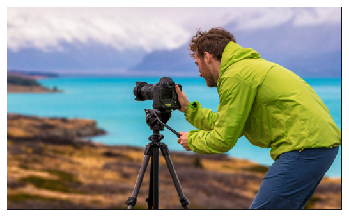

 Filtre Gaussien


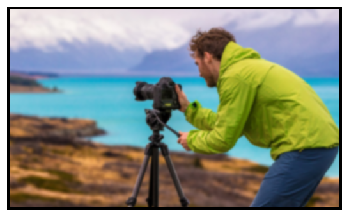

In [193]:
#Appliquer le filtre de Gauss et afficher l'image et sa transformée
image.filtreGaussien()

## Filtre Laplacien : Détection des bords

C:\Users\Coumbiss\Anaconda3\lib\site-packages\ipykernel_launcher.py:261: RuntimeWarning: overflow encountered in ubyte_scalars
C:\Users\Coumbiss\Anaconda3\lib\site-packages\ipykernel_launcher.py:273: RuntimeWarning: overflow encountered in ubyte_scalars
C:\Users\Coumbiss\Anaconda3\lib\site-packages\ipykernel_launcher.py:280: RuntimeWarning: overflow encountered in ubyte_scalars
C:\Users\Coumbiss\Anaconda3\lib\site-packages\ipykernel_launcher.py:281: RuntimeWarning: overflow encountered in ubyte_scalars
C:\Users\Coumbiss\Anaconda3\lib\site-packages\ipykernel_launcher.py:289: RuntimeWarning: overflow encountered in ubyte_scalars
C:\Users\Coumbiss\Anaconda3\lib\site-packages\ipykernel_launcher.py:296: RuntimeWarning: overflow encountered in ubyte_scalars
C:\Users\Coumbiss\Anaconda3\lib\site-packages\ipykernel_launcher.py:304: RuntimeWarning: overflow encountered in ubyte_scalars
C:\Users\Coumbiss\Anaconda3\lib\site-packages\ipykernel_launcher.py:305: RuntimeWarning: overflow encountered i

 Image Originale


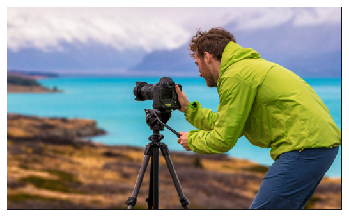

 Détection des bords


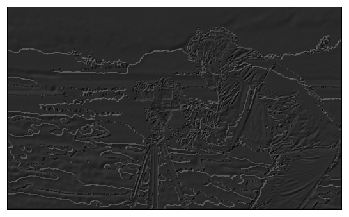

In [206]:
#Détecter les bords et afficher et le filtre
image.filtreLaplacien()